In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [15]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0,3], cov=[[1.0,0.5],[0.5,1.0]], size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3,0], cov=[[1.0,0.5],[0.5,1.0]], size=num_samples_per_class
)

inputs = np.vstack([negative_samples, positive_samples]).astype(np.float32)
targets = np.vstack((
    np.zeros((num_samples_per_class,1), dtype="float32"),
    np.ones((num_samples_per_class,1), dtype="float32")
))

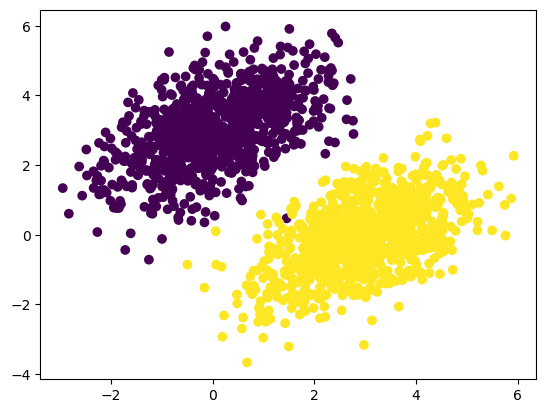

In [16]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [17]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [18]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [19]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(predictions - targets)
    return tf.reduce_mean(per_sample_losses)

In [20]:
learning_rate = 0.1

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [W,b])
    W.assign_sub(learning_rate * grad_loss_wrt_w)
    b.assign_sub(learning_rate * grad_loss_wrt_b)
    return loss

In [21]:
for step in range(40):
    loss = train_step(inputs, targets)
    print(f"Loss at step {step}: is {loss}")

Loss at step 0: is 0.47546660900115967
Loss at step 1: is 0.08407977968454361
Loss at step 2: is 0.07853782176971436
Loss at step 3: is 0.07358349859714508
Loss at step 4: is 0.06908760219812393
Loss at step 5: is 0.0650068148970604
Loss at step 6: is 0.06130269542336464
Loss at step 7: is 0.057940468192100525
Loss at step 8: is 0.05488855764269829
Loss at step 9: is 0.052118346095085144
Loss at step 10: is 0.04960382729768753
Loss at step 11: is 0.04732140153646469
Loss at step 12: is 0.045249633491039276
Loss at step 13: is 0.043369095772504807
Loss at step 14: is 0.04166213050484657
Loss at step 15: is 0.040112707763910294
Loss at step 16: is 0.038706306368112564
Loss at step 17: is 0.03742970898747444
Loss at step 18: is 0.03627094626426697
Loss at step 19: is 0.035219140350818634
Loss at step 20: is 0.03426440432667732
Loss at step 21: is 0.033397797495126724
Loss at step 22: is 0.0326111763715744
Loss at step 23: is 0.0318971611559391
Loss at step 24: is 0.031249042600393295
Loss

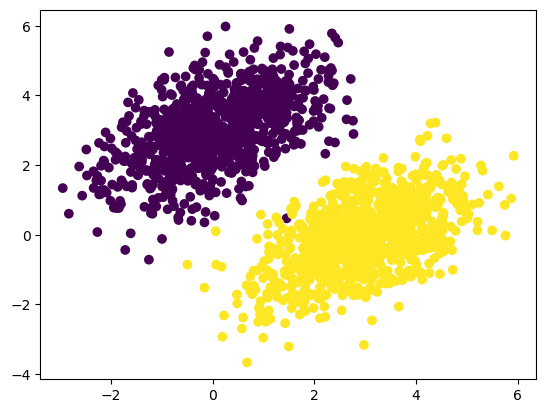

In [22]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0] > 0.5)
plt.show()

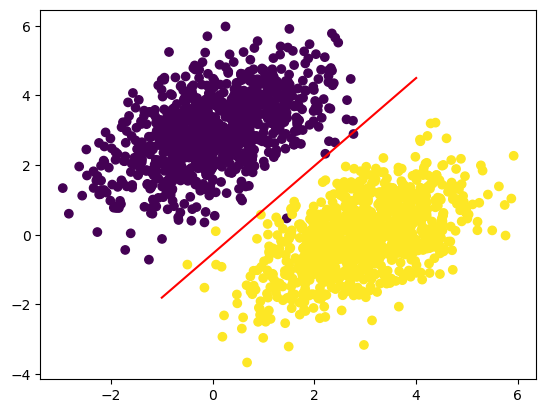

In [25]:
x = np.linspace(-1,4,100)
y = -W[0] / W[1] * x + (0.5-b) / W[1]
plt.plot(x,y, "-r")
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0] > 0.5)
plt.show()